In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [3]:
train = pd.read_csv('/content/drive/MyDrive/energy/train.csv',encoding='cp949')
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


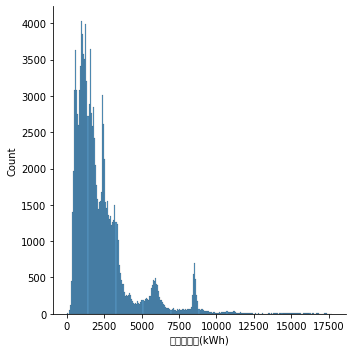

In [4]:
sns.displot(train['전력사용량(kWh)'])

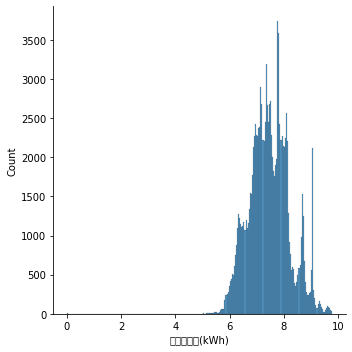

In [5]:
sns.displot(np.log1p(train['전력사용량(kWh)']))

In [6]:
test = pd.read_csv('/content/drive/MyDrive/energy/test.csv',encoding='cp949')
test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train[['num','비전기냉방설비운영','태양광보유']]
ice = {}
hot = {}
count = 0
for i in range(0,len(train), len(train)//60):
  count += 1
  ice[count] = train.loc[i,'비전기냉방설비운영']
  hot[count] = train.loc[i,'태양광보유']

In [8]:
for i in range(len(test)):
    test.loc[i, '비전기냉방설비운영']=ice[test['num'][i]]
    test.loc[i, '태양광보유']=hot[test['num'][i]]

In [9]:
def time(x):
    return int(x[-2:])
train['time']=train['date_time'].apply(lambda x: time(x))
test['time']=test['date_time'].apply(lambda x: time(x))

def weekday(x):
    return pd.to_datetime(x[:10]).weekday()
train['weekday']=train['date_time'].apply(lambda x :weekday(x))
test['weekday']=test['date_time'].apply(lambda x :weekday(x))

In [10]:
test=test.interpolate(method='values')

In [11]:
display(train,test)

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,weekday
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,3,0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,19,0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,20,0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,21,0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,22,0


,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,time,weekday
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0,0,1
1,1,2020-08-25 01,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0,1,1
2,1,2020-08-25 02,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0,2,1
3,1,2020-08-25 03,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0,3,1
4,1,2020-08-25 04,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0,19,0
10076,60,2020-08-31 20,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0,20,0
10077,60,2020-08-31 21,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,21,0
10078,60,2020-08-31 22,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,22,0


In [12]:
test = test.rename(columns={'강수량(mm, 6시간)':'강수량(mm)','일조(hr, 3시간)':'일조(hr)'})
test

,num,date_time,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,weekday
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0,0,1
1,1,2020-08-25 01,27.633333,1.366667,75.333333,0.0,0.000000,0.0,0.0,1,1
2,1,2020-08-25 02,27.466667,1.233333,76.666667,0.0,0.000000,0.0,0.0,2,1
3,1,2020-08-25 03,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0,3,1
4,1,2020-08-25 04,26.900000,1.166667,79.666667,0.0,0.000000,0.0,0.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,28.633333,3.566667,66.000000,0.0,0.533333,1.0,1.0,19,0
10076,60,2020-08-31 20,28.266667,3.833333,67.000000,0.0,0.266667,1.0,1.0,20,0
10077,60,2020-08-31 21,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,21,0
10078,60,2020-08-31 22,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0,22,0


In [13]:
alldata = pd.concat([train,test])
alldata

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,weekday
0,1,2020-06-01 00,8179.056,17.600000,2.500000,92.0,0.8,0.000000,0.0,0.0,0,0
1,1,2020-06-01 01,8135.640,17.700000,2.900000,91.0,0.3,0.000000,0.0,0.0,1,0
2,1,2020-06-01 02,8107.128,17.500000,3.200000,91.0,0.0,0.000000,0.0,0.0,2,0
3,1,2020-06-01 03,8048.808,17.100000,3.200000,91.0,0.0,0.000000,0.0,0.0,3,0
4,1,2020-06-01 04,8043.624,17.000000,3.300000,92.0,0.0,0.000000,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,28.633333,3.566667,66.0,0.0,0.533333,1.0,1.0,19,0
10076,60,2020-08-31 20,NaN,28.266667,3.833333,67.0,0.0,0.266667,1.0,1.0,20,0
10077,60,2020-08-31 21,NaN,27.900000,4.100000,68.0,0.0,0.000000,1.0,1.0,21,0
10078,60,2020-08-31 22,NaN,27.900000,4.100000,68.0,0.0,0.000000,1.0,1.0,22,0


In [14]:
alldata['date_time'] = pd.to_datetime(alldata['date_time'])
alldata['month'] = alldata['date_time'].dt.month
alldata['day'] = alldata['date_time'].dt.day
alldata['hour'] = alldata['date_time'].dt.hour
alldata['week'] = alldata['date_time'].dt.week
alldata['time'] = alldata['date_time'].dt.date - alldata['date_time'].dt.date.min()
alldata['weekday'] = alldata['date_time'].dt.dayofweek
alldata['time'] = alldata['time'].apply(lambda x : x.days)
alldata

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,weekday,month,day,hour,week
0,1,2020-06-01 00:00:00,8179.056,17.600000,2.500000,92.0,0.8,0.000000,0.0,0.0,0,0,6,1,0,23
1,1,2020-06-01 01:00:00,8135.640,17.700000,2.900000,91.0,0.3,0.000000,0.0,0.0,0,0,6,1,1,23
2,1,2020-06-01 02:00:00,8107.128,17.500000,3.200000,91.0,0.0,0.000000,0.0,0.0,0,0,6,1,2,23
3,1,2020-06-01 03:00:00,8048.808,17.100000,3.200000,91.0,0.0,0.000000,0.0,0.0,0,0,6,1,3,23
4,1,2020-06-01 04:00:00,8043.624,17.000000,3.300000,92.0,0.0,0.000000,0.0,0.0,0,0,6,1,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,NaN,28.633333,3.566667,66.0,0.0,0.533333,1.0,1.0,91,0,8,31,19,36
10076,60,2020-08-31 20:00:00,NaN,28.266667,3.833333,67.0,0.0,0.266667,1.0,1.0,91,0,8,31,20,36
10077,60,2020-08-31 21:00:00,NaN,27.900000,4.100000,68.0,0.0,0.000000,1.0,1.0,91,0,8,31,21,36
10078,60,2020-08-31 22:00:00,NaN,27.900000,4.100000,68.0,0.0,0.000000,1.0,1.0,91,0,8,31,22,36


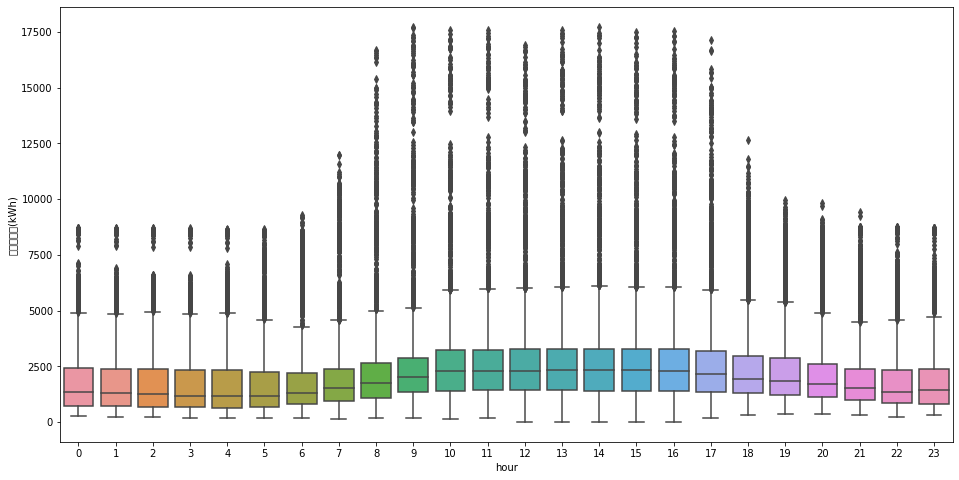

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(alldata['hour'],alldata['전력사용량(kWh)'])

In [16]:
alldata2 = alldata.drop(columns=['date_time','전력사용량(kWh)'])
alldata2

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,weekday,month,day,hour,week
0,1,17.600000,2.500000,92.0,0.8,0.000000,0.0,0.0,0,0,6,1,0,23
1,1,17.700000,2.900000,91.0,0.3,0.000000,0.0,0.0,0,0,6,1,1,23
2,1,17.500000,3.200000,91.0,0.0,0.000000,0.0,0.0,0,0,6,1,2,23
3,1,17.100000,3.200000,91.0,0.0,0.000000,0.0,0.0,0,0,6,1,3,23
4,1,17.000000,3.300000,92.0,0.0,0.000000,0.0,0.0,0,0,6,1,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,28.633333,3.566667,66.0,0.0,0.533333,1.0,1.0,91,0,8,31,19,36
10076,60,28.266667,3.833333,67.0,0.0,0.266667,1.0,1.0,91,0,8,31,20,36
10077,60,27.900000,4.100000,68.0,0.0,0.000000,1.0,1.0,91,0,8,31,21,36
10078,60,27.900000,4.100000,68.0,0.0,0.000000,1.0,1.0,91,0,8,31,22,36


In [17]:
def processing(x):
  if x == 0.0:
    return 0
  else:
      return 1

In [18]:
alldata2['비전기냉방설비운영'] = alldata2['비전기냉방설비운영'].apply(processing)
alldata2['태양광보유'] = alldata2['태양광보유'].apply(processing)
alldata2

,num,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,weekday,month,day,hour,week
0,1,17.600000,2.500000,92.0,0.8,0.000000,0,0,0,0,6,1,0,23
1,1,17.700000,2.900000,91.0,0.3,0.000000,0,0,0,0,6,1,1,23
2,1,17.500000,3.200000,91.0,0.0,0.000000,0,0,0,0,6,1,2,23
3,1,17.100000,3.200000,91.0,0.0,0.000000,0,0,0,0,6,1,3,23
4,1,17.000000,3.300000,92.0,0.0,0.000000,0,0,0,0,6,1,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,60,28.633333,3.566667,66.0,0.0,0.533333,1,1,91,0,8,31,19,36
10076,60,28.266667,3.833333,67.0,0.0,0.266667,1,1,91,0,8,31,20,36
10077,60,27.900000,4.100000,68.0,0.0,0.000000,1,1,91,0,8,31,21,36
10078,60,27.900000,4.100000,68.0,0.0,0.000000,1,1,91,0,8,31,22,36


In [19]:
alldata2['num'] = alldata2['num'].astype('object')
alldata2['비전기냉방설비운영'] = alldata2['비전기냉방설비운영'].astype('object')
alldata2['태양광보유'] = alldata2['태양광보유'].astype('object')
alldata2['time'] = alldata2['time'].astype('object')
alldata2['weekday'] = alldata2['weekday'].astype('object')
alldata2['month	'] = alldata2['month'].astype('object')
alldata2['day'] = alldata2['day'].astype('object')
alldata2['hour'] = alldata2['hour'].astype('object')
alldata2['week'] = alldata2['week'].astype('object')

In [20]:
alldata3 = pd.get_dummies(alldata2)
alldata3

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),month,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,num_23,num_24,num_25,num_26,num_27,num_28,num_29,num_30,num_31,num_32,num_33,num_34,...,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,week_36,month\t_6,month\t_7,month\t_8
0,17.600000,2.500000,92.0,0.8,0.000000,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,17.700000,2.900000,91.0,0.3,0.000000,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,17.500000,3.200000,91.0,0.0,0.000000,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,17.100000,3.200000,91.0,0.0,0.000000,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,17.000000,3.300000,92.0,0.0,0.000000,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,28.633333,3.566667,66.0,0.0,0.533333,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
10076,28.266667,3.833333,67.0,0.0,0.266667,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
10077,27.900000,4.100000,68.0,0.0,0.000000,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
10078,27.900000,4.100000,68.0,0.0,0.000000,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [22]:
alldata4 = ss.fit_transform(alldata3)
alldata4 = pd.DataFrame(alldata4, columns=alldata3.columns)
alldata4

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),month,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,num_23,num_24,num_25,num_26,num_27,num_28,num_29,num_30,num_31,num_32,num_33,num_34,...,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,week_36,month\t_6,month\t_7,month\t_8
0,-1.997256,0.212119,0.766181,0.052366,-0.551852,-1.241546,7.681146,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,...,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,3.484660,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.104828,1.437591,-0.712879,-0.712879
1,-1.968403,0.472090,0.700661,-0.113956,-0.551852,-1.241546,7.681146,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,...,4.795832,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,3.484660,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.104828,1.437591,-0.712879,-0.712879
2,-2.026109,0.667068,0.700661,-0.213748,-0.551852,-1.241546,7.681146,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,...,-0.208514,4.795832,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,3.484660,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.104828,1.437591,-0.712879,-0.712879
3,-2.141522,0.667068,0.700661,-0.213748,-0.551852,-1.241546,7.681146,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,...,-0.208514,-0.208514,4.795832,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,-0.208514,3.484660,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.286972,-0.104828,1.437591,-0.712879,-0.712879
4,-2.170375,0.732060,0.766181,-0.213748,-0.551852,-1.241546,7.681146,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.130189,-0.13018

In [23]:
train2 = alldata4[:len(train)]
test2 = alldata4[len(train):]

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1000)

In [25]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(ridge,train2,train['전력사용량(kWh)'],cv=10,n_jobs=-1,scoring='neg_mean_absolute_error').mean()
print(-cvs)

1315.0221836840676


In [26]:
for i in [1,10,50,100,200,300,500,700,1000]:
  r_cv = Ridge(alpha=i)
  cvs = cross_val_score(r_cv,train2,train['전력사용량(kWh)'],cv=10,n_jobs=-1,scoring='neg_mean_absolute_error').mean()
  print((-cvs),i)

1315.0616901556514 1
1315.061145061643 10
1315.0587612056554 50
1315.055873327563 100
1315.050426863939 200
1315.0454274427907 300
1315.0368236089212 500
1315.0299110217245 700
1315.0221836840676 1000


In [27]:
ridge.fit(train2,np.log1p(train['전력사용량(kWh)']))

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
result = ridge.predict(test2)

In [29]:
sub = pd.read_csv('/content/drive/MyDrive/energy/sample_submission.csv')
sub

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


In [30]:
result

array([8.86973686, 8.83229026, 8.81039802, ..., 8.09559068, 8.00297057,
       7.99444065])

In [31]:
sub['answer'] = np.exp(result)-1
sub

,num_date_time,answer
0,1 2020-08-25 00,7112.408897
1,1 2020-08-25 01,6850.961666
2,1 2020-08-25 02,6702.586914
3,1 2020-08-25 03,6545.596239
4,1 2020-08-25 04,6459.810000
...,...,...
10075,60 2020-08-31 19,3979.017246
10076,60 2020-08-31 20,3703.845982
10077,60 2020-08-31 21,3278.973689
10078,60 2020-08-31 22,2988.826308


In [32]:
sub.to_csv('sub1.csv',index=False)